In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def D_alpha(t, delta, phi):
    return np.sin(delta*t/2) * np.exp(1j*delta*t/2) * np.exp(1j*phi)

In [6]:
def plot_phase_space(ax, alpha, *args, **kwargs):
    x, y = np.real(alpha), np.imag(alpha)
    ax.plot(x, y, *args, **kwargs)

    all_x_data = np.array([])
    all_y_data = np.array([])

    for line in ax.get_lines():
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        all_x_data = np.concatenate([all_x_data, x_data])
        all_y_data = np.concatenate([all_y_data, y_data])

    # Calculate the maximum range considering all curves
    max_range = max(np.abs(all_x_data).max(), np.abs(all_y_data).max()) * 1.1

    ax.set(
        xlim=(-max_range, max_range),
        ylim=(-max_range, max_range),
        aspect=1,
        # xticks=np.arange(-1, 1.1, 0.5),
        # yticks=np.arange(-1, 1.1, 0.5),
    )
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

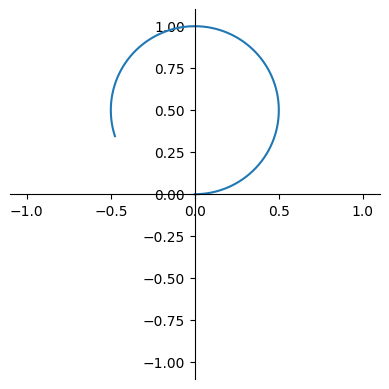

In [7]:
delta = 1
t = np.linspace(0, 2 * np.pi, 100) * 0.8
alpha = D_alpha(t, delta, 0)


fig, ax = plt.subplots()
plot_phase_space(ax, alpha)

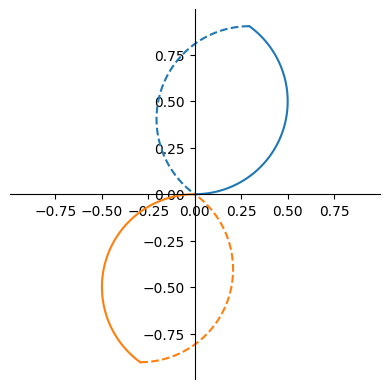

In [8]:
t = np.linspace(0, 2 * np.pi, 100) * 0.4

alpha1 = D_alpha(t, delta, 0)
alpha2 = D_alpha(t, delta, np.pi) + alpha1[-1]

fig, ax = plt.subplots()
plot_phase_space(ax, alpha1)
plot_phase_space(ax, alpha2, "C0--")

plot_phase_space(ax, -alpha1)
plot_phase_space(ax, -alpha2, "C1--")

In [9]:
from qhlib.simulation import SDFSolver

In [67]:
solver = SDFSolver(N_ho=50, phi_m=np.pi/2, sideband_imbalance=False, center_line_detuning=True)

Omega = 2 * np.pi * 2    # MHz
delta = 2 * np.pi * 0.1  # MHz
eta = 0.1
alpha = 0.1
delta_c = 2 * np.pi * 0.05  # MHz


args = solver.make_args(
    Omega=Omega,
    delta=delta,
    eta=eta,
    alpha_Omega=alpha * Omega,
    delta_c=delta_c,
)

psi0 = solver.make_psi0(spin='z', n=0, thermal=False)

In [68]:
t = np.arange(0, 15, 0.05)

options = {"method": "bdf", "atol": 1e-10, "progress_bar": True}
res = solver.run(t, psi0, args, options=options)

10.0%. Run time:   0.19s. Est. time left: 00:00:00:01
20.1%. Run time:   0.34s. Est. time left: 00:00:00:01
30.1%. Run time:   0.43s. Est. time left: 00:00:00:01
40.1%. Run time:   0.60s. Est. time left: 00:00:00:00
50.2%. Run time:   0.75s. Est. time left: 00:00:00:00
60.2%. Run time:   0.90s. Est. time left: 00:00:00:00
70.2%. Run time:   1.09s. Est. time left: 00:00:00:00
80.3%. Run time:   1.26s. Est. time left: 00:00:00:00
90.3%. Run time:   1.35s. Est. time left: 00:00:00:00
100.0%. Run time:   1.45s. Est. time left: 00:00:00:00
Total run time:   1.45s


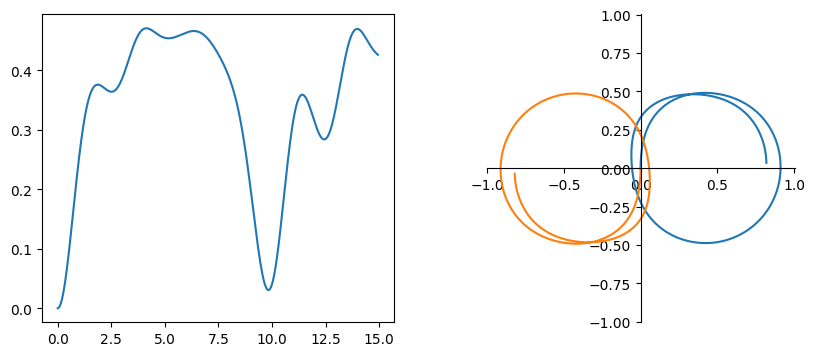

In [69]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(10, 4))

ax.plot(res.times, res.e_data["e"])
plot_phase_space(ax1, res.e_data["a_minus"])
plot_phase_space(ax1, res.e_data["a_plus"])